In [1]:
import numpy as np
import numpy.matlib
import time
from scipy import misc
import imageio
import matplotlib.pyplot as plt

import sys
sys.path.append('../lib/')
import utils.bbox as bbox   
from dataflow.detectiondb import DetectionDB
from utils.viz import draw_bounding_box
import model.anchor as anchor

In [2]:
# Test correct ness of anchor generate
anchor.gen_im_anchors(width, height, stride=16,
                   ratios=(1, 0.5, 2), scales=(8, 16, 32))
print(anchor.gen_anchors())

NameError: name 'width' is not defined

number of samples: 256, number of positive: 7, 7, 7


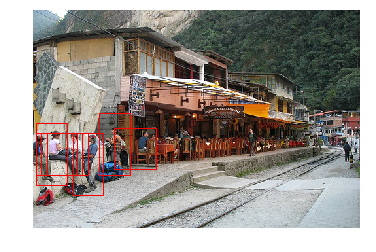

In [5]:
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/000591.jpg'

#5248
im = imageio.imread(im_path)
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/'
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/'
db = DetectionDB('jpg', im_path, xml_path, num_channel=3)
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/000591.xml'
gt_bbox = db._parse_bbox_xml(xml_path)

im_h, im_w = im.shape[0], im.shape[1]
pos_anchor, neg_anchor, pos_position, neg_position,\
        mask, label_map, sampled_gt_bbox, t_s, pos_anchor_idx = anchor.anchor_training_samples(
    im_w, im_h, gt_bbox, stride=8, pos_thr=0.7, neg_thr=0.3, num_sample=128)
draw_bounding_box(im, pos_anchor)

In [3]:
f_size = list(map(int, [np.floor(im_w / 16),
                            np.floor(im_h / 16)]))
f_w = f_size[0]
f_h = f_size[1]
shift_anchors, anchor_position, t = anchor.gen_im_anchors(f_w, f_h, stride=16,
                   ratios=(1, 0.5, 2), scales=(8, 16, 32))
print(shift_anchors)
print(t)


NameError: name 'im_w' is not defined

In [19]:
# print(t.reshape((f_w, f_h, 9, 4)))
tt = t.reshape((-1, 4))
print(tt[9,:])
ttt = t.reshape((f_w, f_h, 9, 4)).transpose(2, 0, 1, 3)
ttt = ttt.reshape((-1, 4))
print(ttt)


[-40. -56.  87.  71.]
[[ -56.  -56.   71.   71.]
 [ -40.  -56.   87.   71.]
 [ -24.  -56.  103.   71.]
 ..., 
 [ 280.  -40.  631.  663.]
 [ 296.  -40.  647.  663.]
 [ 312.  -40.  663.  663.]]


In [21]:
print(len(pos_box))
print(pos_box)

7
[[  60.  188.  107.  283.]
 [ 100.  156.  147.  251.]
 [  20.  188.   83.  251.]
 [ 124.  180.  187.  243.]
 [   4.  188.   67.  251.]
 [   4.  172.   51.  267.]
 [  12.  188.   75.  251.]]


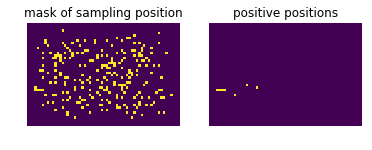

In [22]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(mask)
axarr[0].set_title('mask of sampling position')
axarr[0].axis('off')

axarr[1].imshow(label_map)
axarr[1].set_title('positive positions')
axarr[1].axis('off')

plt.show()

In [23]:
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/000591.jpg'
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/000591.xml'

im = imageio.imread(im_path)
im_h, im_w = im.shape[0], im.shape[1]
stride = 8
f_w, f_h = np.round(im_w / stride), np.round(im_h / stride)

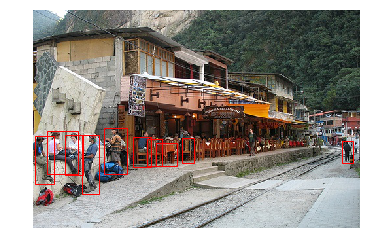

In [26]:
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/'
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/'
db = DetectionDB('jpg', im_path, xml_path, num_channel=3)
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/000591.xml'
gt_bbox = db._parse_bbox_xml(xml_path)
draw_bounding_box(im, gt_bbox)

In [27]:
im_anchors, anchor_position = anchor.gen_im_anchors(f_w, f_h, stride=stride)

In [28]:
valid_anchors, valid_position = anchor.remove_cross_boundary_anchors(im_w, im_h, im_anchors, anchor_position)
print('Number of all anchors: {}, after remove boundary cross: {}'.format( 
      im_anchors.shape[0], valid_anchors.shape[0]))

Number of all anchors: 23436, after remove boundary cross: 9474


2.520254135131836
Number of positive anchors: 7, negative anchors: 249


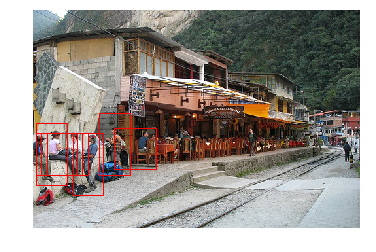

In [29]:
t = time.time()
pos_box, neg_box, pos_position, neg_position = anchor.get_gt_anchors(valid_anchors, valid_position, gt_bbox, pos_thr=0.7, neg_thr=0.3)
print(time.time() - t)
print('Number of positive anchors: {}, negative anchors: {}'.format(pos_box.shape[0], neg_box.shape[0]))
draw_bounding_box(im, pos_box)

In [46]:
print(pos_box.shape[0], pos_position.shape[0])
print(neg_box.shape[0], neg_position.shape[0])

59 59
197 197
